In [2]:
%cd ..

/Users/juansegundohevia/Documents/repos/rice-datathon-2024-chevron


In [4]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/preprocessed.csv")
data.head()

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,horizontal_toe_x,horizontal_toe_y,OilPeakRate,surface_toe_len,surface_midpoint_len,surface_bh_len,toe_midpoint_len,toe_bh_len,midpoint_bh_len,custom_average_proppant
0,1383493.751,717329.2368,1382854.564,712767.3700,1121,3963.582677,NaN,76000.0000,NaN,8712.598425,...,1382668.912,712798.4321,46.623023,4605.274216,2574.858525,4606.429064,2030.417329,188.232620,2036.619900,16.502818
1,1380344.035,711916.2732,1379738.429,707860.5643,1022,3179.133858,NaN,113000.0000,5.610964e+05,8627.952756,...,1379630.025,707907.6708,59.750009,4071.695406,2404.599977,4100.674738,1668.050207,118.196656,1696.365976,27.752567
2,1379915.895,717845.0063,1379274.644,713471.9952,1304,3810.039370,12.0,286571.4286,1.621424e+06,8801.181102,...,1378960.372,713530.4490,10.785716,4419.098200,2526.314428,4419.777022,1892.858275,319.661910,1911.023700,64.848396
3,1383567.443,706640.2010,1382891.477,702068.3838,1022,3723.425197,11.0,106878.9286,4.377134e+05,8635.826772,...,1382727.299,702098.4882,123.797638,4618.765755,2623.401717,4621.519506,1995.403970,166.915220,2001.319121,23.140149
4,1378962.585,702623.9787,1379643.546,707204.9131,1022,3811.023622,NaN,112789.7143,6.229802e+05,8664.370079,...,1379987.487,707123.7258,102.309540,4614.991666,2593.345157,4631.270653,2021.675395,353.393250,2056.456384,24.439852


In [5]:
pd.set_option("display.max_columns", None)

# Clustering on X,Y positions

In [6]:
data.columns

Index(['surface_x', 'surface_y', 'bh_x', 'bh_y', 'standardized_operator_name',
       'gross_perforated_length', 'number_of_stages', 'total_proppant',
       'total_fluid', 'true_vertical_depth', 'ffs_frac_type',
       'proppant_intensity', 'frac_fluid_intensity', 'average_stage_length',
       'average_proppant_per_stage', 'average_frac_fluid_per_stage',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'pad_id', 'relative_well_position',
       'batch_frac_classification', 'well_family_relationship', 'frac_type',
       'frac_seasoning', 'horizontal_midpoint_x', 'horizontal_midpoint_y',
       'horizontal_toe_x', 'horizontal_toe_y', 'OilPeakRate',
       'surface_toe_len', 'surface_midpoint_len', 'surface_bh_len',
       'toe_midpoint_len', 'toe_bh_len', 'midpoint_bh_len',
       'custom_average_proppant'],
      dtype='object')

In [7]:
position_features = [col for col in data.columns if col.endswith("_x") or col.endswith("_y") or col.endswith("_len")]

df_position = data[position_features].copy()

In [9]:
df_position.dropna(inplace=True)

In [10]:
df_position.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17868 entries, 0 to 19305
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surface_x              17868 non-null  float64
 1   surface_y              17868 non-null  float64
 2   bh_x                   17868 non-null  float64
 3   bh_y                   17868 non-null  float64
 4   horizontal_midpoint_x  17868 non-null  float64
 5   horizontal_midpoint_y  17868 non-null  float64
 6   horizontal_toe_x       17868 non-null  float64
 7   horizontal_toe_y       17868 non-null  float64
 8   surface_toe_len        17868 non-null  float64
 9   surface_midpoint_len   17868 non-null  float64
 10  surface_bh_len         17868 non-null  float64
 11  toe_midpoint_len       17868 non-null  float64
 12  toe_bh_len             17868 non-null  float64
 13  midpoint_bh_len        17868 non-null  float64
dtypes: float64(14)
memory usage: 2.0 MB


100%|██████████| 48/48 [02:04<00:00,  2.60s/it]


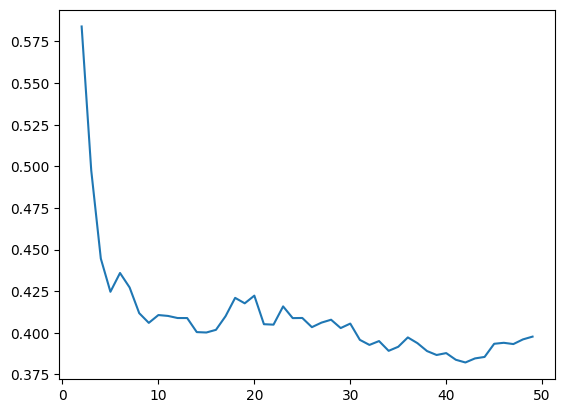

In [16]:
# Check if we need both surface and bh
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from tqdm import tqdm

n_clusters = np.arange(2, 50)
silhouette_scores = []

SEED = 1234

for cluster_size in tqdm(n_clusters):

    model = KMeans(n_clusters=cluster_size, random_state=SEED, n_init='auto')
    cluster_labels = model.fit_predict(df_position)
    
    X = df_position.values
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(n_clusters, silhouette_scores)


([<matplotlib.axis.XTick at 0x176d4edf0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45')])

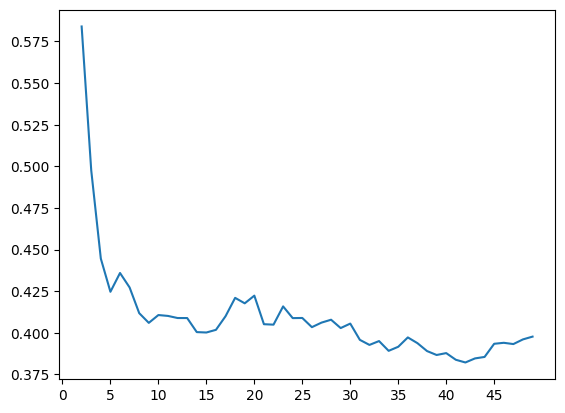

In [17]:
plt.plot(n_clusters, silhouette_scores)
plt.xticks(np.arange(0, 50, 5))

100%|██████████| 9/9 [00:00<00:00, 12.61it/s]


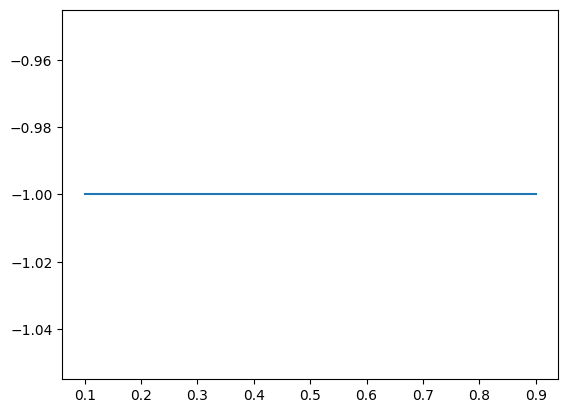

In [22]:
# compare with DBSCAN
eps_values = np.arange(0.1, 1.0, 0.1)
silhouette_scores = []

for eps in tqdm(eps_values):
    model = DBSCAN(eps=eps)
    
    X = df_position.values
    cluster_labels = model.fit_predict(X)
    if len(np.unique(cluster_labels)) < 2:
        silhouette_scores.append(-1)
        continue
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(eps_values, silhouette_scores)

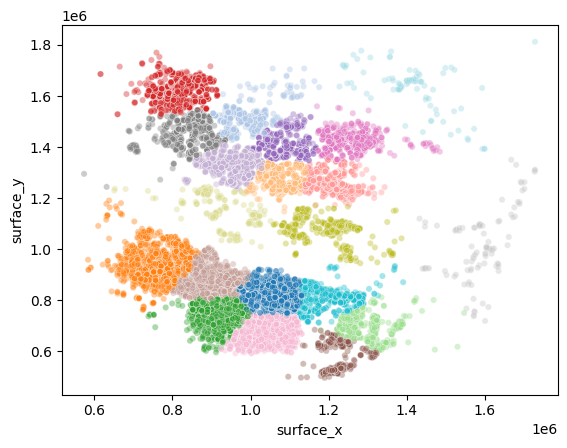

In [26]:
# Keeping KMeans with 20 clusters
model = KMeans(n_clusters=20, random_state=SEED, n_init='auto')
cluster_labels = model.fit_predict(df_position)

df_position["cluster"] = cluster_labels

# plot surface X and Y with hue by cluster
import seaborn as sns

sns.scatterplot(
    data=df_position,
    x="surface_x",
    y="surface_y",
    hue="cluster",
    palette="tab20",
    alpha=0.4,
    s=20, markers="x"
)
plt.legend().remove()

In [32]:
df_position = df_position.merge(data[["OilPeakRate"]], left_index=True, right_index=True)

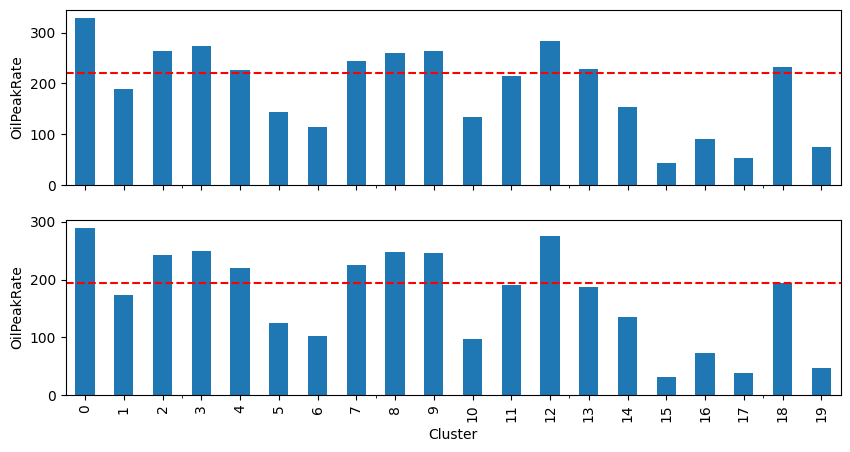

In [36]:
fig, ax = plt.subplots(2,1, figsize=(10, 5), sharex=True)

df_position.groupby("cluster").OilPeakRate.mean().plot.bar(ax=ax[0])
ax[0].set_ylabel("OilPeakRate")
ax[0].set_xlabel("Cluster")
ax[0].axhline(df_position.OilPeakRate.mean(), color="red", linestyle="--", label="Mean")

df_position.groupby("cluster").OilPeakRate.median().plot.bar(ax=ax[1])
ax[1].set_ylabel("OilPeakRate")
ax[1].set_xlabel("Cluster")
ax[1].axhline(df_position.OilPeakRate.median(), color="red", linestyle="--", label="median")


Text(0.5, 0, 'Cluster')

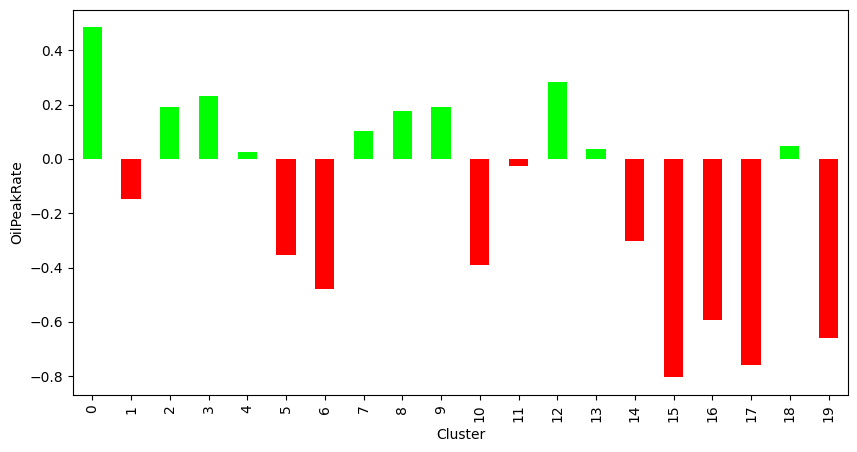

In [46]:
fig, ax = plt.subplots(1,1, figsize=(10, 5), sharex=True)

aux = df_position.groupby("cluster").OilPeakRate.mean()\
    .apply(lambda x: (x - df_position.OilPeakRate.mean()) / df_position.OilPeakRate.mean())

colors = [(0, 1, 0) if x > 0 else (1, 0, 0) for x in aux.values]
aux.plot.bar(ax=ax, color=colors)

# aux.plot.bar(ax=ax)
# map colors to be green if posiutive, red if negative
ax.set_ylabel("OilPeakRate")
ax.set_xlabel("Cluster")


In [48]:
cluster_labels

[{0: (0, 1, 0)},
 {1: (1, 0, 0)},
 {2: (0, 1, 0)},
 {3: (0, 1, 0)},
 {4: (0, 1, 0)},
 {5: (1, 0, 0)},
 {6: (1, 0, 0)},
 {7: (0, 1, 0)},
 {8: (0, 1, 0)},
 {9: (0, 1, 0)},
 {10: (1, 0, 0)},
 {11: (1, 0, 0)},
 {12: (0, 1, 0)},
 {13: (0, 1, 0)},
 {14: (1, 0, 0)},
 {15: (1, 0, 0)},
 {16: (1, 0, 0)},
 {17: (1, 0, 0)},
 {18: (0, 1, 0)},
 {19: (1, 0, 0)}]

<Axes: xlabel='surface_x', ylabel='surface_y'>

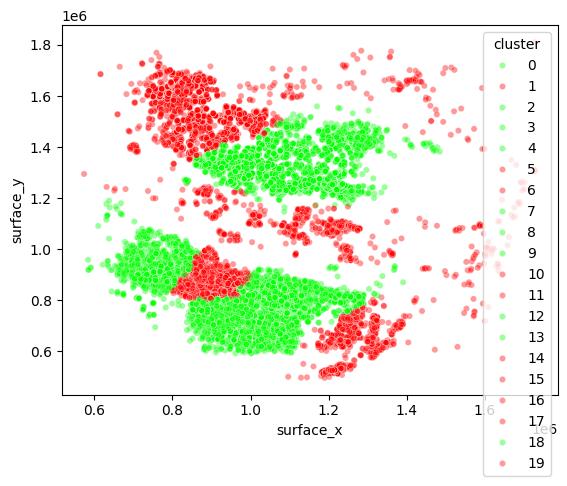

In [50]:
cluster_labels = {i: colors[i] for i in range(len(colors))}

sns.scatterplot(
    data=df_position,
    x="surface_x",
    y="surface_y",
    hue="cluster",
    palette=cluster_labels,
    alpha=0.4,
    s=20, markers="x"
)

<Axes: xlabel='cluster', ylabel='OilPeakRate'>

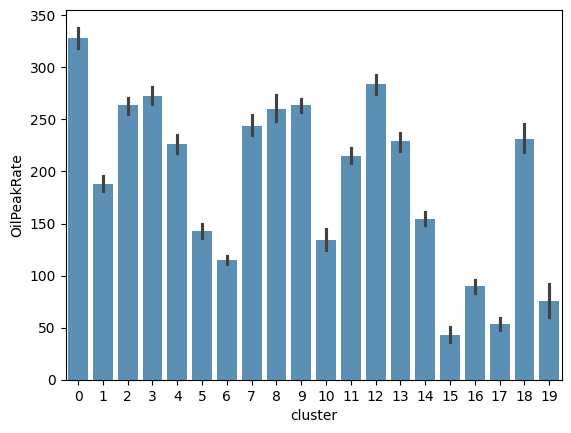

In [54]:
sns.barplot(
    data=df_position,
    x="cluster",
    y="OilPeakRate",
    alpha=0.8,
)

<Axes: xlabel='surface_x', ylabel='surface_y'>

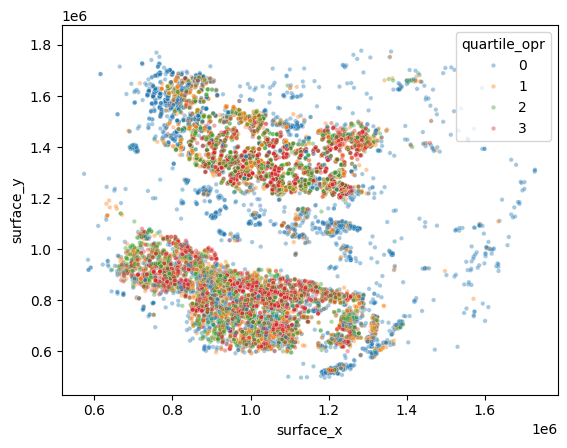

In [57]:
df_position["quartile_opr"] = pd.qcut(df_position.OilPeakRate, 4, labels=False)

sns.scatterplot(
    data=df_position,
    x="surface_x",
    y="surface_y",
    hue="quartile_opr",
    palette="tab10",
    alpha=0.4,
    s=10, markers="x"
)

In [59]:
# save KMeans cluster models
import pickle

with open("model/kmeans_geocluster.pkl", "wb") as f:
    pickle.dump(model, f)

In [70]:
cluster_opr_mapping = (df_position.groupby("cluster").OilPeakRate.mean() - df_position.OilPeakRate.mean())\
    .div(df_position.OilPeakRate.mean())\
    .to_dict()

cluster_opr_mapping

{0: 0.4837077922933474,
 1: -0.14831358222325786,
 2: 0.1910998203924342,
 3: 0.2330868898719763,
 4: 0.024606370528818696,
 5: -0.3542297913333188,
 6: -0.4800087860381113,
 7: 0.10263912780062938,
 8: 0.17668050942162444,
 9: 0.19211572773551633,
 10: -0.39241703167127745,
 11: -0.026837482088282724,
 12: 0.28321533994034853,
 13: 0.034809057066054895,
 14: -0.30293189030721585,
 15: -0.8048362832439552,
 16: -0.5939852971492275,
 17: -0.7591450328530416,
 18: 0.04661120718376958,
 19: -0.6601232075725695}

In [72]:
df_position["opr_mean_pct_diff"]  = df_position.cluster.map(cluster_opr_mapping)
df_position[["cluster", "opr_mean_pct_diff"]]

,cluster,opr_mean_pct_diff
0,5,-0.354230
1,5,-0.354230
2,5,-0.354230
3,5,-0.354230
4,5,-0.354230
...,...,...
19301,17,-0.759145
19302,17,-0.759145
19303,17,-0.759145
19304,17,-0.759145


In [76]:
df_position.rename(index={"index": "original_data_index"}).to_csv("data/cluster_label_features.csv")